# Exercise 1: Get And Prepare The Text

In [1]:
import numpy as np
import re
import requests
import matplotlib.pyplot as plt

In [2]:
# get raw text from internet
book = requests.get('https://www.gutenberg.org/files/35/35-0.txt')

# extract just the text and have a look at it
text = book.text
print(type(text))
print(len(text))

text[:2000]

<class 'str'>
182973


'*** START OF THE PROJECT GUTENBERG EBOOK 35 ***\r\n\r\n\r\n\r\n\r\nThe Time Machine\r\n\r\nAn Invention\r\n\r\nby H. G. Wells\r\n\r\n\r\nCONTENTS\r\n\r\n I Introduction\r\n II The Machine\r\n III The Time Traveller Returns\r\n IV Time Travelling\r\n V In the Golden Age\r\n VI The Sunset of Mankind\r\n VII A Sudden Shock\r\n VIII Explanation\r\n IX The Morlocks\r\n X When Night Came\r\n XI The Palace of Green Porcelain\r\n XII In the Darkness\r\n XIII The Trap of the White Sphinx\r\n XIV The Further Vision\r\n XV The Time Traveller’s Return\r\n XVI After the Story\r\n Epilogue\r\n\r\n\r\n\r\n\r\n I.\r\n Introduction\r\n\r\n\r\nThe Time Traveller (for so it will be convenient to speak of him) was\r\nexpounding a recondite matter to us. His pale grey eyes shone and\r\ntwinkled, and his usually pale face was flushed and animated. The fire\r\nburnt brightly, and the soft radiance of the incandescent lights in the\r\nlilies of silver caught the bubbles that flashed and passed in our\r\nglas

In [3]:
# character strings to replace with space
strings2replace = [
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing
                 ]

# e.g., 'â\x80\x9d'.encode('latin1').decode('utf8')

# use regular expression (re) to replace those strings with space
for str2match in strings2replace:
  regexp = re.compile(r'%s'%str2match)
  text = regexp.sub(' ',text)

# remove non-ASCII characters
text = re.sub(r'[^\x00-\x7F]+', ' ', text)

# remove numbers
text = re.sub('\d+','',text)

# and make everything lower-case
text = text.lower()

# let's have a look!
text[:2000]

'*** start of the project gutenberg ebook  ***     the time machine  an invention  by h. g. wells   contents   i introduction  ii the machine  iii the time traveller returns  iv time travelling  v in the golden age  vi the sunset of mankind  vii a sudden shock  viii explanation  ix the morlocks  x when night came  xi the palace of green porcelain  xii in the darkness  xiii the trap of the white sphinx  xiv the further vision  xv the time traveller s return  xvi after the story  epilogue      i.  introduction   the time traveller (for so it will be convenient to speak of him) was expounding a recondite matter to us. his pale grey eyes shone and twinkled, and his usually pale face was flushed and animated. the fire burnt brightly, and the soft radiance of the incandescent lights in the lilies of silver caught the bubbles that flashed and passed in our glasses. our chairs, being his patents, embraced and caressed us rather than submitted to be sat upon, and there was that luxurious after-

In [4]:
# split by punctuation
import string
print(string.punctuation)
puncts4re = f'[{string.punctuation}\s]+'

words = re.split(puncts4re,text)
words = [item.strip() for item in words if item.strip()]

# remove single-character words
words = [item for item in words if len(item)>1]

# let's have a look!
words[:10]

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['start',
 'of',
 'the',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'time',
 'machine',
 'an']

In [5]:
# create the vocab! (set of unique words)
vocab = sorted(set(words))

# convenience variables for later
nWords = len(words)
nLex = len(vocab)

print(f'{nWords} words')
print(f' {nLex} unique tokens')

30698 words
 4589 unique tokens


In [6]:
# Creating dictionaries

word2idx = {w:i for i,w in enumerate(vocab)}
idx2word = {i:w for i,w in enumerate(vocab)}

for i in list(word2idx.items())[0:696:31]:
  print(i)

('abandon', 0)
('account', 31)
('adventures', 62)
('algal', 93)
('amidst', 124)
('antenn', 155)
('appetite', 186)
('arrange', 217)
('assume', 248)
('aware', 279)
('basis', 310)
('began', 341)
('bewilderment', 372)
('blinking', 403)
('bosses', 434)
('bringing', 465)
('burst', 496)
('cannibal', 527)
('cast', 558)
('chance', 589)
('childlike', 620)
('clambering', 651)
('clothed', 682)


In [7]:
# Creating the functions

def encoder(words,encoded_dict):

    idxs = np.zeros(len(words), dtype=int)

    for i,w in enumerate(words):

        idxs[i] = encoded_dict[w]

    return idxs

def decoder(idxs,decoded_dict):
    return " ".join([decoded_dict[i] for i in idxs])

# Testing the functions

print( encoder( ["the","time","machine"], word2idx ) )
print( decoder( [31, 69, 89, 51], idx2word ) )

[4042 4109 2416]
account afraid aisle admired


# Exercise 2: A Random Walk Through The Time Machine

In [8]:
# Test with random token indices
randToken = np.random.choice(range(len(vocab)), size=10)

print(f"Random tokens:\n\t{randToken}")
print(f"\nDecoded text:\n\t{decoder(randToken, idx2word)}")

Random tokens:
	[1160 3345  364 2564 3011 3003 2131 1644 4018 3272]

Decoded text:
	dropping roar bench moonlight practicable potentialities intellectual fruits temporary reptilian


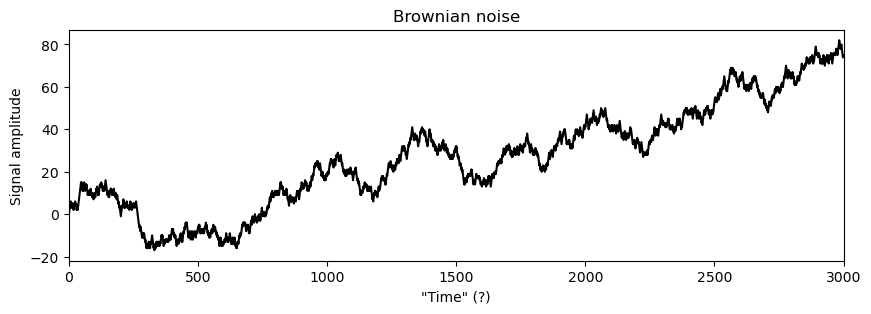

In [9]:
# A brief aside on Brownian noise
brownNoise = np.cumsum(np.random.choice([-1,1],3000))

plt.figure(figsize=(10,3))
plt.plot(brownNoise,'k')
plt.gca().set(xlim=[0,len(brownNoise)],xlabel='"Time" (?)',ylabel='Signal amplitude',title='Brownian noise')
plt.show()

In [10]:
# Brownian noise
brownNoise = np.cumsum(np.random.choice([-1,1],30))
print(brownNoise)

BrownianRandomTokens = brownNoise + np.random.choice(nLex,1)
print(BrownianRandomTokens)
print('')

# test with random token indices
print(f'Brownian random tokens: \n\t{BrownianRandomTokens}\n')
print(f'Decoded text: \n\t{decoder(BrownianRandomTokens,idx2word)}')

[-1  0 -1 -2 -1 -2 -1  0 -1  0  1  0  1  0  1  0  1  0  1  0 -1  0 -1  0
  1  0 -1 -2 -1  0]
[4046 4047 4046 4045 4046 4045 4046 4047 4046 4047 4048 4047 4048 4047
 4048 4047 4048 4047 4048 4047 4046 4047 4046 4047 4048 4047 4046 4045
 4046 4047]

Brownian random tokens: 
	[4046 4047 4046 4045 4046 4045 4046 4047 4046 4047 4048 4047 4048 4047
 4048 4047 4048 4047 4048 4047 4046 4047 4046 4047 4048 4047 4046 4045
 4046 4047]

Decoded text: 
	themselves then themselves them themselves them themselves then themselves then theories then theories then theories then theories then theories then themselves then themselves then theories then themselves them themselves then


# Exercise 3: Distribution Of Word Lengths

In [11]:
wordLenghts = np.zeros(len(words), dtype=int)
print(f"The size of the array:\t{len(wordLenghts)}")

for i,w in enumerate(words):
    wordLenghts[i] = len(w)

print(f"\nThe first 10 word's length:\t{wordLenghts[:10]}")

The size of the array:	30698

The first 10 word's length:	[5 2 3 7 9 5 3 4 7 2]


In [12]:
barArray

NameError: name 'barArray' is not defined

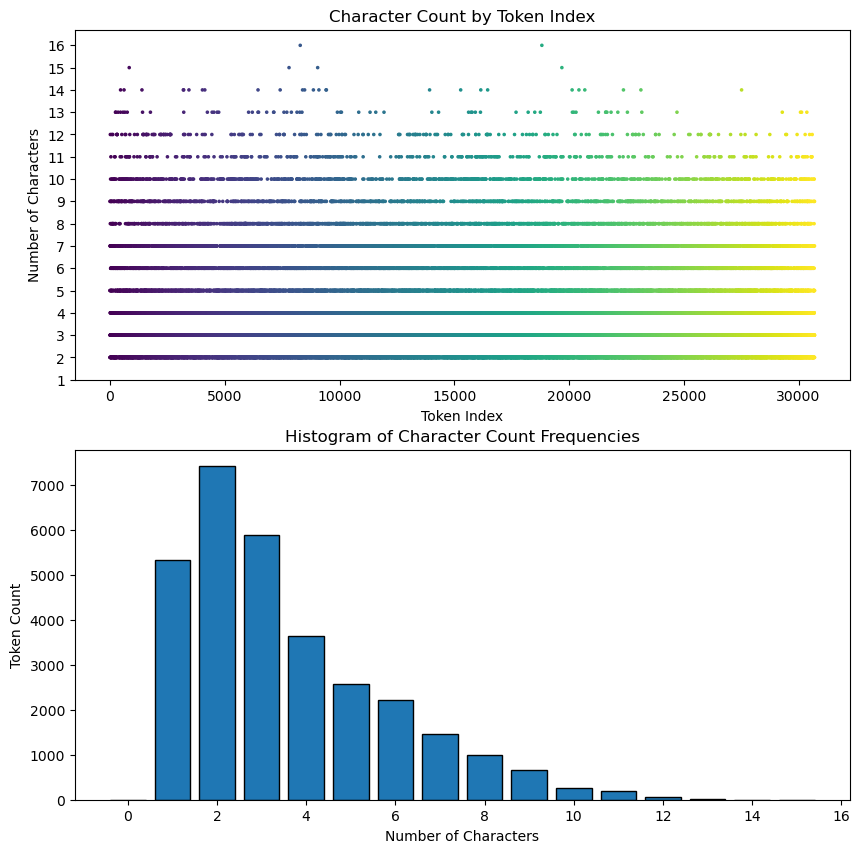

In [13]:
barArray = np.zeros(max(wordLenghts), dtype=int)

for i in range(max(wordLenghts)):
    barArray[i] = len(np.where(wordLenghts==i+1)[0]) 

fig, ax = plt.subplots(2, 1, figsize=(10,10))

ax[0].scatter(range(len(words)), wordLenghts, s=10, marker=".", c=np.linspace(.1,.9,len(wordLenghts)))
ax[0].set(xlabel="Token Index", ylabel="Number of Characters",
           title="Character Count by Token Index", yticks=range(1,max(wordLenghts)+1))

ax[1].bar(range(len(barArray)), barArray, edgecolor="k")
ax[1].set(xlabel='Number of Characters',
           ylabel='Token Count',title='Histogram of Character Count Frequencies')
plt.show()

# Exercise 4: Encode a Novel Sentence

In [108]:
TheSentence = "The space aliens came to Earth to steal watermelons and staplers."

# preprocess
newWords = re.split( f'[,.\s]+', TheSentence.lower() )

# remove empty items
newWords = [item.strip() for item in newWords if item.strip()]
newWords

['the',
 'space',
 'aliens',
 'came',
 'to',
 'earth',
 'to',
 'steal',
 'watermelons',
 'and',
 'staplers']

In [ ]:
# Encoding the new sentence (got error)

encoder( newWords, word2idx )

KeyError: 'aliens'

# Exercise 5: Create a New Encoder

In [112]:
# Copy the dictionaries
new_word2idx = word2idx.copy()
new_idx2word = idx2word.copy()

# Add a new key to dictionaries
new_word2idx["<|unk|>"] = len(word2idx)+1
new_idx2word[len(idx2word)+1] = "<|unk|>"

# Define the new functions
def new_encoder(words, dict):

    idxs = np.zeros(len(words), dtype=int)

    for i,w in enumerate(words):
        if w in dict:
            idxs[i] = dict[w]
        else:
            idxs[i] = dict["<|unk|>"]
    
    return idxs

# No need to define a new decoder function

In [118]:
# Encoding the new sentence with new encoder function
tokenIdx = new_encoder(newWords, new_word2idx)

print("\t",tokenIdx)
print("\n\t",decoder(tokenIdx, new_idx2word))


	 [4042 3734 4590  519 4119 1191 4119 4590 4590  137 4590]

	 the space <|unk|> came to earth to <|unk|> <|unk|> and <|unk|>
